# KAGGLE: ANUAL DEATHS BY CAUSES

### Data Import

In [7]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# Visualitzarem 0 decimals per mostra ja que tot i ser float64 fam referencia a nombres enters
pd.set_option('display.float_format', lambda x: '%.0f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset
dataset = load_dataset('annual_deaths_by_causes.csv')
data = dataset.values

x = data[:, :2]
y = data[:, 2]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (7273, 35)
Dimensionalitat de les entrades X (7273, 2)
Dimensionalitat de l'atribut Y (7273,)


In [8]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
country                                    0
code                                    1067
year                                       0
meningitis                               433
alzheimer's_diesease                     433
parkinson's_disease                      433
nutritional_deficiency                   433
malaria                                  433
drowning                                 433
interpersonal_violence                   433
maternal_disorders                       433
hiv/aids                                 433
drug_use_disorders                       433
tuberculosis                             433
cardiovascular_diseases                  433
lower_respiratory_infections             433
neonatal_disorders                       433
alcohol_use_disorders                    433
self_harm                                433
exposure_to_forces_of_nature             433
diarrheal_diseases                       433
environme

In [9]:
print("Per visualitzar les primeres 5 mostres de la BBDD:")
dataset.head() 

Per visualitzar les primeres 5 mostres de la BBDD:


,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
0,Afghanistan,AFG,2007,2933,1402,450,2488,393,2127,3657,...,4490,512,2439,1199,7425,7222,3346,6458,481,3437
1,Afghanistan,AFG,2008,2731,1424,455,2277,255,1973,3785,...,4534,495,2231,1092,7355,7143,3316,6408,462,3005
2,Afghanistan,AFG,2009,2460,1449,460,2040,239,1852,3874,...,4597,483,1998,1065,7290,7045,3291,6358,448,2663
3,Afghanistan,AFG,2011,2327,1508,473,1846,390,1775,4170,...,4785,483,1805,1525,7432,6916,3318,6370,448,2365
4,Afghanistan,AFG,2012,2254,1544,482,1705,94,1716,4245,...,4846,482,1667,3521,7494,6878,3353,6398,445,2264


In [4]:
print("Visualitzem el tipus de les dades de la nostre base de dades:")
dataset.dtypes


Visualitzem el tipus de les dades de la nostre base de dades:


country                                  object
code                                     object
year                                      int64
meningitis                              float64
alzheimer's_diesease                    float64
parkinson's_disease                     float64
nutritional_deficiency                  float64
malaria                                 float64
drowning                                float64
interpersonal_violence                  float64
maternal_disorders                      float64
hiv/aids                                float64
drug_use_disorders                      float64
tuberculosis                            float64
cardiovascular_diseases                 float64
lower_respiratory_infections            float64
neonatal_disorders                      float64
alcohol_use_disorders                   float64
self_harm                               float64
exposure_to_forces_of_nature            float64
diarrheal_diseases                      

In [10]:
print("Per veure estadístiques dels atributs numèrics de la BBDD:")
dataset.describe()


Per veure estadístiques dels atributs numèrics de la BBDD:


,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,maternal_disorders,hiv/aids,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
count,7273,6840,6840,6840,6840,6840,6840,6840,6840,6840,...,6840,6840,6840,2891,6840,6840,6840,6840,6840,6840
mean,2004,8213,27363,6494,11006,18903,8619,10637,6131,28141,...,25069,2145,9532,349,30635,91304,31899,56526,3006,3112
std,9,34983,111315,25767,48290,97347,35879,40889,26355,139197,...,96008,8434,41690,1917,116700,377201,119439,210988,11212,14440
min,1990,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
25%,1997,19,129,37,11,0,39,48,6,14,...,214,8,6,0,208,368,205,400,21,2
50%,2004,150,846,209,159,0,253,342,70,187,...,1080,72,120,5,1240,2104,1541,2778,152,22
75%,2012,1622,4251,984,2204,1017,1014,1391,1244,3836,...,4498,371,2120,60,5786,9013,5670,9594,593,264
max,2019,432524,1623276,362907,757152,961129,460665,463129,302586,1844490,...,1427232,92101,656314,44490,1285039,3974315,1472012,2557689,129705,166405


<IPython.core.display.Javascript object>


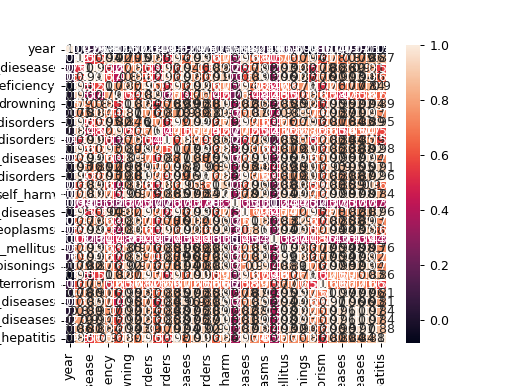

In [13]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)